## Import neccessary libraries

In [32]:
import pandas as pd
from scipy.stats import norm 
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [33]:
fdata1 = pd.read_csv('nation_level_daily_25_July.csv')

In [34]:
fdata2 = fdata1.copy().truncate(before = '38')
fdata2 = fdata2.reset_index().drop('index',axis = 1)

In [35]:
fdata3 = fdata2.copy()
fdata3.index.name = 'day_num'
fdata3.rename(columns = {'totalconfirmed':'total_case_data'},inplace = True)
fdata3.rename(columns = {'totaldeceased':'removed_case_data'},inplace = True)
fdata3['removed_case_data'] += fdata3['totalrecovered']
fdata3 = fdata3.drop('totalrecovered', axis = 1)
fdata3.rename(columns = {'dailyconfirmed':'daily_discovered_data'},inplace = True)
fdata3.rename(columns = {'dailydeceased':'daily_removed_data'},inplace = True)
fdata3['daily_removed_data'] += fdata3['dailyrecovered']
fdata3 = fdata3.drop('dailyrecovered', axis = 1)
fdata3.tail(30)

,date,total_case_data,removed_case_data,daily_discovered_data,daily_removed_data
day_num,,,,,
110,26-Jun,509448,311608,18255,10627
111,27-Jun,529590,326251,20142,14643
112,28-Jun,549200,338266,19610,12015
113,29-Jun,567539,352180,18339,13914
114,30-Jun,585795,365251,18256,13071
115,1-Jul,605224,377753,19429,12502
116,2-Jul,627171,398130,21947,20377
117,3-Jul,649889,412991,22718,14861
118,4-Jul,673907,428348,24018,15357


In [36]:
data1 = pd.read_csv('nation_level_daily_18_July.csv')

In [37]:
data2 = data1.copy().truncate(before = '38')
data2 = data2.reset_index().drop('index',axis = 1)
data2.head()

,date,totalconfirmed,totaldeceased,totalrecovered,dailyconfirmed,dailydeceased,dailyrecovered
0,8-Mar,39,0,3,5,0,0
1,9-Mar,48,0,3,9,0,0
2,10-Mar,63,0,4,15,0,1
3,11-Mar,71,0,4,8,0,0
4,12-Mar,81,1,4,10,1,0


In [38]:
data3 = data2.copy()
data3.index.name = 'day_num'
data3.rename(columns = {'totalconfirmed':'total_case_data'},inplace = True)
data3.rename(columns = {'totaldeceased':'removed_case_data'},inplace = True)
data3['removed_case_data'] += data3['totalrecovered']
data3 = data3.drop('totalrecovered', axis = 1)
data3.rename(columns = {'dailyconfirmed':'daily_discovered_data'},inplace = True)
data3.rename(columns = {'dailydeceased':'daily_removed_data'},inplace = True)
data3['daily_removed_data'] += data3['dailyrecovered']
data3 = data3.drop('dailyrecovered', axis = 1)
data3.head()

,date,total_case_data,removed_case_data,daily_discovered_data,daily_removed_data
day_num,,,,,
0,8-Mar,39,3,5,0
1,9-Mar,48,3,9,0
2,10-Mar,63,4,15,1
3,11-Mar,71,4,8,0
4,12-Mar,81,5,10,1


In [39]:
data3['Dynamic_hidden_nodes'] = data3.iloc[0:14, 1]*0.5
data3['discovered_nodes'] = data3.iloc[0:14, 1]
data3['daily_discovered_nodes'] = data3.iloc[0:14, 3]
data3['mean'] =np.nan
data3['standard deviation'] = np.nan
data3['Static_hidden_nodes'] = data3.iloc[0:14, 1]*0.5
data4 = data3.copy()
data3.tail(14)

,date,total_case_data,removed_case_data,daily_discovered_data,daily_removed_data,Dynamic_hidden_nodes,discovered_nodes,daily_discovered_nodes,mean,standard deviation,Static_hidden_nodes
day_num,,,,,,,,,,,
119,5-Jul,697849,444598,23942,16250,NaN,NaN,NaN,NaN,NaN,NaN
120,6-Jul,720349,460386,22500,15788,NaN,NaN,NaN,NaN,NaN,NaN
121,7-Jul,743496,477701,23147,17315,NaN,NaN,NaN,NaN,NaN,NaN
122,8-Jul,769057,497701,25561,20000,NaN,NaN,NaN,NaN,NaN,NaN
123,9-Jul,794847,517588,25790,19887,NaN,NaN,NaN,NaN,NaN,NaN
124,10-Jul,822609,538397,27762,20809,NaN,NaN,NaN,NaN,NaN,NaN
125,11-Jul,850366,558921,27757,20524,NaN,NaN,NaN,NaN,NaN,NaN
126,12-Jul,879472,577619,29106,18698,NaN,NaN,NaN,NaN,NaN,NaN
127,13-Jul,907650,595843,28178,18224,NaN,NaN,NaN,NaN,NaN,NaN


## Main Functions

In [40]:
def add_hidden_nodes(hid_nod, mu, sig):
    add =  0
    step = (mu + 3*sig)/50
    points = np.arange (0, mu+3*sig, step)  
    R = norm.pdf(points, mu, sig) 
    for i in range(0, len(points)-1):
        add += hid_nod*(points[i]+points[i+1])/2*step*(R[i]+R[i+1])/2
    return add
add_hidden_nodes(167,1.5,0.5)

249.4961457675584

In [41]:
def remove_hidden_nodes(z,mu,sig):
    remove = 0 
    points = np.arange(0,14,1)
    R = norm.pdf(points, mu, sig)
    for i in range(0, len(points)):
        remove += z[i]*R[i]
        z[i] = z[i]*(1-R[i])
    return list([z,remove])
example = list(data4.iloc[0:14, 5])
remove_hidden_nodes(example,7,2)

[[19.491491343723304,
  23.946817819056744,
  31.223929267226296,
  34.54166034439091,
  37.87726868776569,
  39.99516601718949,
  42.022334167510365,
  44.82961614875988,
  51.90994220692457,
  64.16806855505126,
  79.96312278528312,
  96.32744715759719,
  126.87818876841162,
  166.62994065760316],
 59.195006073506384]

In [42]:
def optimize_parameters(table, pos):
    ''' pos is the position the 7 places after which we are considering '''
    ''' Returns the optimized mu and sig parameters for the the series of 7 readings'''
    if pos+21<=len(table):
        real_data = list(table.iloc[pos:pos+14, 3])
        history = []
        history = list(table.iloc[pos-14:pos,5])
        data_mat =[]
        mu_list = list(np.linspace(0.1, 2, 50))
        sig_list = list(np.linspace(0.01,0.2,50))
        for i in range(0,len(mu_list)):
            temp_list =[]
            for j in range(0,len(sig_list)):
                model_data = []
                work_history = history.copy()
                for k in range(0,14):
                    new_hidden1 = work_history[-1]+ add_hidden_nodes(work_history[-1], mu_list[i], sig_list[j])
                    rem1 = remove_hidden_nodes(work_history,7,2)
                    sub1 = rem1[-1]
                    work_history = rem1[:-1][0]
                    new_hidden1 = new_hidden1 - sub1 - work_history[0]
                    model_data.append(sub1)
                    work_history.append(new_hidden1)
                    del work_history[0]
                error_list = np.array(real_data) - np.array(model_data)
                error = float(np.sqrt(np.sum(np.square(error_list))))
                temp_list.append(error)
            data_mat.append(temp_list)
        data_mat = np.array(data_mat)
        opt_ind = np.argwhere(data_mat == np.min(data_mat))
        result =[]
        result.append(mu_list[int(opt_ind[0,0])])
        result.append(sig_list[int(opt_ind[0,1])])
    elif pos +14<=len(table) and pos+21>len(table):
        ex = len(table)%7
        real_data = list(table.iloc[pos:pos+14+ex, 3])
        history = []
        history = list(table.iloc[pos-14:pos,5])
        data_mat =[]
        mu_list = list(np.linspace(0.1, 2, 50))
        sig_list = list(np.linspace(0.01,0.2,50))
        for i in range(0,len(mu_list)):
            temp_list =[]
            for j in range(0,len(sig_list)): 
                model_data = []
                work_history = history.copy()
                for k in range(0,14+ex):
                    new_hidden1 = work_history[-1]+ add_hidden_nodes(work_history[-1], mu_list[i], sig_list[j])
                    rem1 = remove_hidden_nodes(work_history,7,2)
                    sub1 = rem1[-1]
                    work_history = rem1[:-1][0]
                    new_hidden1 = new_hidden1 - sub1 - work_history[0]
                    model_data.append(sub1)
                    work_history.append(new_hidden1)
                    del work_history[0]
                
                abs_diff = float(np.sum(np.square(np.array([abs(i) for i in work_history]) - np.array(work_history))))  
                error_list = np.array(real_data) - np.array(model_data)
                error = float(np.sqrt(np.sum(np.square(error_list))))+abs_diff
                temp_list.append(error)
            data_mat.append(temp_list)
        data_mat = np.array(data_mat)
        opt_ind = np.argwhere(data_mat == np.min(data_mat))
        result =[]
        result.append(mu_list[int(opt_ind[0,0])])
        result.append(sig_list[int(opt_ind[0,1])])
    else: 
        result = optimize_parameters(table, pos-7)
    
    return result
            
optimize_parameters(data4, 14)

[0.6816326530612244, 0.01]

In [43]:
def update_table(table, pos):
    new_hidden = 0 
    opt_param = optimize_parameters(table, pos)
    if pos+21<=len(table):
        for k in range(0,7):
            history_14 = list(table.iloc[pos-14+k:pos+k,5])
            new_hidden = history_14[-1]+ add_hidden_nodes(history_14[-1], opt_param[0], opt_param[1])
            rem = remove_hidden_nodes(history_14,7,2)
            sub = float(rem[-1])
            new_hidden = new_hidden - sub
            table.iloc[pos+k,7] = sub
            table.iloc[pos-14+k:pos+k,5] = rem[:-1][0]
            table.iloc[pos+k,5] = new_hidden - table.iloc[pos-14+k,5]
            table.iloc[pos+k,10] = new_hidden - table.iloc[pos-14+k,5]
            table.iloc[pos-14+k,5] = 0
            table.iloc[pos+k,6] = table.iloc[pos+k-1,6] + table.iloc[pos+k,7]
            table.iloc[pos+k,8] = opt_param[0]
            table.iloc[pos+k,9] = opt_param[1]
        print('updated for day {} to day {}'.format(pos,pos+6))
    else:
        for k in range(0,len(table)-pos):
            history_14 = list(table.iloc[pos-14+k:pos+k,5])
            new_hidden = history_14[-1]+ add_hidden_nodes(history_14[-1], opt_param[0], opt_param[1])
            rem = remove_hidden_nodes(history_14,7,2)
            sub = float(rem[-1])
            new_hidden = new_hidden - sub
            table.iloc[pos+k,7] = sub
            table.iloc[pos-14+k:pos+k,5] = rem[:-1][0]
            table.iloc[pos+k,5] = new_hidden - table.iloc[pos-14+k,5]
            table.iloc[pos+k,10] = new_hidden - table.iloc[pos-14+k,5]
            table.iloc[pos-14+k,5] = 0
            table.iloc[pos+k,6] = table.iloc[pos+k-1,6] + table.iloc[pos+k,7]
            table.iloc[pos+k,8] = opt_param[0]
            table.iloc[pos+k,9] = opt_param[1]
        print('updated for day {} to day {}'.format(pos,len(table)-1))
    return table
data4 = update_table(data4, 14)
data4.tail(35)

updated for day 14 to day 20


,date,total_case_data,removed_case_data,daily_discovered_data,daily_removed_data,Dynamic_hidden_nodes,discovered_nodes,daily_discovered_nodes,mean,standard deviation,Static_hidden_nodes
day_num,,,,,,,,,,,
98,14-Jun,333043,179207,11405,7682,NaN,NaN,NaN,NaN,NaN,NaN
99,15-Jun,343075,190242,10032,11035,NaN,NaN,NaN,NaN,NaN,NaN
100,16-Jun,354161,199472,11086,9230,NaN,NaN,NaN,NaN,NaN,NaN
101,17-Jun,367268,206702,13107,7230,NaN,NaN,NaN,NaN,NaN,NaN
102,18-Jun,381098,217787,13829,11084,NaN,NaN,NaN,NaN,NaN,NaN
103,19-Jun,395838,227180,14740,9393,NaN,NaN,NaN,NaN,NaN,NaN
104,20-Jun,411753,241462,15918,14282,NaN,NaN,NaN,NaN,NaN,NaN
105,21-Jun,426893,250957,15140,9495,NaN,NaN,NaN,NaN,NaN,NaN
106,22-Jun,440451,262154,13548,11191,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
data_table = data3.copy()
start = 14
while start +14<= len(data_table):
    data_table = update_table(data_table, start)
    start+=7

updated for day 14 to day 20
updated for day 21 to day 27
updated for day 28 to day 34
updated for day 35 to day 41
updated for day 42 to day 48
updated for day 49 to day 55
updated for day 56 to day 62
updated for day 63 to day 69
updated for day 70 to day 76
updated for day 77 to day 83
updated for day 84 to day 90
updated for day 91 to day 97
updated for day 98 to day 104
updated for day 105 to day 111
updated for day 112 to day 118
updated for day 119 to day 132


In [45]:
data_table.tail(50)

,date,total_case_data,removed_case_data,daily_discovered_data,daily_removed_data,Dynamic_hidden_nodes,discovered_nodes,daily_discovered_nodes,mean,standard deviation,Static_hidden_nodes
day_num,,,,,,,,,,,
83,30-May,181860,92118,8364,4508,0.000000,1.770360e+05,7189.780777,1.340816,0.010000,15076.052864
84,31-May,190649,97268,8789,5150,0.000000,1.845847e+05,7548.784022,0.759184,0.013878,15656.971476
85,1-Jun,198372,101351,7723,4083,0.000000,1.924982e+05,7913.473333,0.759184,0.013878,16210.981727
86,2-Jun,207187,106104,8815,4753,0.000000,2.007975e+05,8299.256674,0.759184,0.013878,16692.055825
87,3-Jun,216876,110152,9689,4048,0.000000,2.095144e+05,8716.957959,0.759184,0.013878,16999.431595
88,4-Jun,226723,114816,9847,4664,0.000000,2.186781e+05,9163.653881,0.759184,0.013878,16945.617483
89,5-Jun,236195,119872,9472,5056,0.000000,2.282958e+05,9617.737756,0.759184,0.013878,16202.442509
90,6-Jun,246603,125602,10408,5730,0.000000,2.383410e+05,10045.159793,0.759184,0.013878,14189.318183
91,7-Jun,257485,131054,10882,5452,0.000000,2.487501e+05,10409.072108,1.030612,0.056531,14509.958104


## Plot Data

In [46]:
#data_table = data_table[data_table['Static_hidden_nodes'].notna()]

Text(0, 0.5, 'Total cases confirmed')

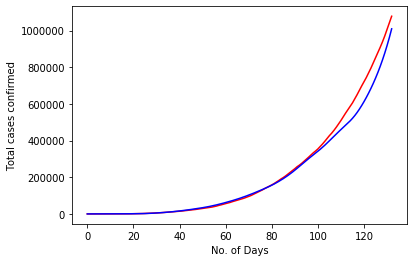

In [47]:
plt.plot(data_table.index, data_table['total_case_data'],'r')
plt.plot(data_table.index, data_table['discovered_nodes'],'b')
plt.xlabel('No. of Days')
plt.ylabel('Total cases confirmed')

Text(0, 0.5, 'Daily increase in cases')

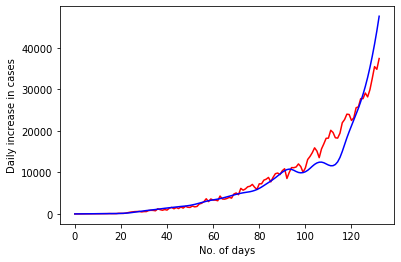

In [48]:
plt.plot(data_table.index, data_table['daily_discovered_data'],'r')
plt.plot(data_table.index, data_table['daily_discovered_nodes'],'b')
plt.xlabel('No. of days')
plt.ylabel('Daily increase in cases')

Text(0, 0.5, 'Daily value of hidden nodes')

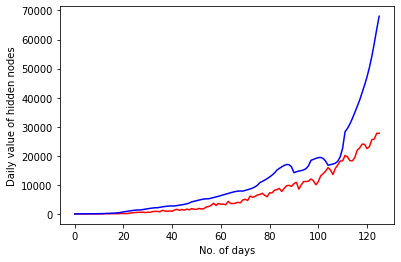

In [49]:
plt.plot(data_table.index[0:-7], data_table['daily_discovered_data'][0:-7],'r')
plt.plot(data_table.index[0:-7], data_table['Static_hidden_nodes'][0:-7],'b')
plt.xlabel('No. of days')
plt.ylabel('Daily value of hidden nodes')

Text(0, 0.5, 'Ratio of hidden to daily detected cases per day')

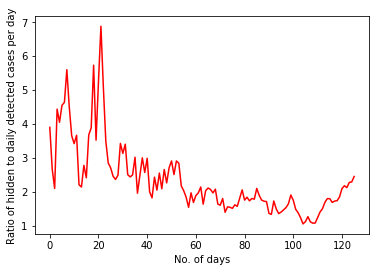

In [50]:
plt.plot(data_table.index[0:-7], data_table['Static_hidden_nodes'][0:-7]/(data_table['daily_discovered_data'][0:-7]),'r')
plt.xlabel('No. of days')
plt.ylabel('Ratio of hidden to daily detected cases per day')

## Bayesian Update of Parameters for prediction

In [51]:
ind = (len(data_table)-21)//7
Day =[]
mean_daily_spread =[]
std_daily_spread = []
for i in range(ind):
    Day.append(14+i*7)
for j in Day:
    mean_daily_spread.append(data_table.iloc[j,8])
    std_daily_spread.append(data_table.iloc[j,9])
dict1 = {'Day':Day, 'mean_daily_spread':mean_daily_spread,'std_daily_spread':std_daily_spread}
pred_table = pd.DataFrame(dict1)
pred_table['posterior_mean'] =np.nan
pred_table['posterior_std_for_mean'] =np.nan
pred_table.iloc[1,3] = pred_table.iloc[0,1]
pred_table.iloc[1,4] = pred_table.iloc[0,2]
parameters = list(pred_table.iloc[1,:])
sig = parameters[4]*parameters[2]/(parameters[2] + 7*parameters[4])
mu = parameters[2]*parameters[3]/(parameters[2] + 7*parameters[4]) + 7*parameters[4]*parameters[1]/(parameters[2] + 7*parameters[4])
pred_table.iloc[2,3] = mu
pred_table.iloc[2,4] = sig
pred_table = pred_table[pred_table['mean_daily_spread'].notna()]
pred_table

,Day,mean_daily_spread,std_daily_spread,posterior_mean,posterior_std_for_mean
0,14,0.681633,0.010000,NaN,NaN
1,21,0.410204,0.013878,0.681633,0.010000
2,28,0.604082,0.013878,0.455112,0.001655
3,35,0.991837,0.010000,NaN,NaN
4,42,0.875510,0.013878,NaN,NaN
5,49,0.720408,0.025510,NaN,NaN
6,56,0.797959,0.041020,NaN,NaN
7,63,0.797959,0.072041,NaN,NaN
8,70,0.875510,0.037143,NaN,NaN
9,77,1.340816,0.010000,NaN,NaN


In [52]:
def bayesian_update(pos, table):
    parameters = [table.iloc[pos-2,1], table.iloc[pos-2,2], table.iloc[pos-3,1], table.iloc[pos-3,2]]
    n_day = table.iloc[pos-1,0] - table.iloc[pos-2,0]
    sig = parameters[3]*parameters[1]/(parameters[1] + n_day*parameters[3])
    mu = parameters[1]*parameters[2]/(parameters[1] + n_day*parameters[3]) + n_day*parameters[3]*parameters[0]/(parameters[1] + n_day*parameters[3])
    posterior1 =  [mu, sig]
    parameters = []
    parameters = [table.iloc[pos-1,1], table.iloc[pos-1,2], posterior1[0], posterior1[1]]
    n_day = table.iloc[pos,0] - table.iloc[pos-1,0]
    sig = parameters[3]*parameters[1]/(parameters[1] + n_day*parameters[3])
    mu = parameters[1]*parameters[2]/(parameters[1] + n_day*parameters[3]) + n_day*parameters[3]*parameters[0]/(parameters[1] + n_day*parameters[3])
    return [mu, sig]
bayesian_update(3,pred_table)

[0.5228793374113572, 0.0009018567639257295]

In [53]:
ex_day = len(data_table) - (14 + (ind-1)*7)
new_day = pred_table.iloc[len(pred_table)-1,0]+ex_day
pred_table = pred_table.append(pd.Series([new_day,np.nan,np.nan,np.nan,np.nan],index=['Day','mean_daily_spread', 'std_daily_spread', 'posterior_mean','posterior_std_for_mean']),ignore_index = True)
for i in range(3,len(pred_table)):
    posterior = bayesian_update(i,pred_table)
    pred_table.iloc[i,3] = posterior[0]
    pred_table.iloc[i,4] = posterior[1]
pred_param = [pred_table.iloc[len(pred_table)-1,3],pred_table.iloc[len(pred_table)-2,2] ]
pred_table

,Day,mean_daily_spread,std_daily_spread,posterior_mean,posterior_std_for_mean
0,14.0,0.681633,0.010000,NaN,NaN
1,21.0,0.410204,0.013878,0.681633,0.010000
2,28.0,0.604082,0.013878,0.455112,0.001655
3,35.0,0.991837,0.010000,0.522879,0.000902
4,42.0,0.875510,0.013878,0.805777,0.000783
5,49.0,0.720408,0.025510,0.923980,0.000783
6,56.0,0.797959,0.041020,0.840318,0.001138
7,63.0,0.797959,0.072041,0.767614,0.001934
8,70.0,0.875510,0.037143,0.788057,0.003257
9,77.0,1.340816,0.010000,0.845105,0.003226


In [54]:
#pred_table.to_csv('Bayesian_update.csv')

Text(0, 0.5, 'mean of infecion curve')

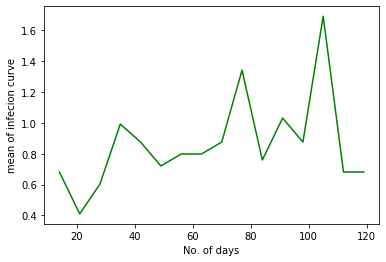

In [55]:
plt.plot(pred_table['Day'], pred_table['mean_daily_spread'], 'g')
plt.xlabel('No. of days')
plt.ylabel('mean of infecion curve')

Text(0, 0.5, 'Bayesian prediction of the mean of infecion curve')

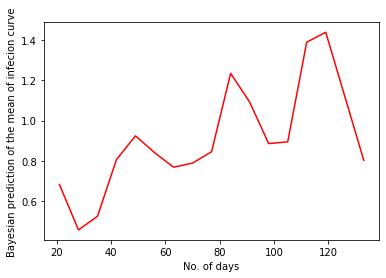

In [56]:
plt.plot(pred_table['Day'], pred_table['posterior_mean'], 'r')
plt.xlabel('No. of days')
plt.ylabel('Bayesian prediction of the mean of infecion curve')

In [57]:
future = data_table.copy().iloc[:,5:]
future.dropna(inplace = True)
future.tail(14)

,Dynamic_hidden_nodes,discovered_nodes,daily_discovered_nodes,mean,standard deviation,Static_hidden_nodes
day_num,,,,,,
119,15066.816139,5.909716e+05,19816.989739,0.681633,0.02551,44292.294129
120,16065.352505,6.121799e+05,21208.286343,0.681633,0.02551,47123.063281
121,17333.744828,6.347521e+05,22572.205995,0.681633,0.02551,50397.924874
122,19176.074145,6.587252e+05,23973.128252,0.681633,0.02551,54249.384153
123,22189.196655,6.841795e+05,25454.265217,0.681633,0.02551,58708.410572
124,27329.691206,7.112266e+05,27047.093966,0.681633,0.02551,63560.832303
125,35496.733492,7.400097e+05,28783.188380,0.681633,0.02551,68022.601385
126,47703.412985,7.707128e+05,30703.018796,0.681633,0.02551,73179.812450
127,62611.366546,8.035656e+05,32852.874765,0.681633,0.02551,79141.635076


In [58]:
ind = len(future)-14
temp = ind
while future.iloc[ind,5]>0 and ind<=temp+6:
    new_entry = []
    history_14 = list(future.iloc[ind:ind+14,0])
    new_hidden = history_14[-1]+ add_hidden_nodes(history_14[-1], pred_param[0], pred_param[1])
    rem = remove_hidden_nodes(history_14,7,3)
    daily_dis = float(rem[-1])
    new_hidden = new_hidden - daily_dis - rem[0][0]
    if new_hidden<0:
        new_hidden = 0
    future.iloc[ind:ind+14,0] = rem[:-1][0]
    dis = future.iloc[ind+13,1]+ daily_dis
    new_entry = [new_hidden, dis, daily_dis,pred_param[0],pred_param[1], new_hidden]
    future.iloc[ind,0] = 0
    future = future.append(pd.Series(new_entry,index=['Dynamic_hidden_nodes','discovered_nodes', 'daily_discovered_nodes', 'mean','standard deviation','Static_hidden_nodes']), ignore_index = True)
    ind +=1


In [59]:
future['Day'] = future.index
future['Day'] += 14
future = future.set_index(future['Day'],drop=True,)
future = future.drop('Day', axis =1 )
future.tail(7)

,Dynamic_hidden_nodes,discovered_nodes,daily_discovered_nodes,mean,standard deviation,Static_hidden_nodes
Day,,,,,,
133,1.121086e+05,1.062268e+06,52969.225747,0.802045,0.02551,1.739376e+05
134,1.745414e+05,1.121380e+06,59112.302733,0.802045,0.02551,2.367372e+05
135,2.811114e+05,1.188334e+06,66953.661911,0.802045,0.02551,3.406823e+05
136,4.621627e+05,1.266443e+06,78109.240102,0.802045,0.02551,5.149246e+05
137,7.676518e+05,1.361891e+06,95448.309312,0.802045,0.02551,8.085305e+05
138,1.280681e+06,1.485683e+06,123792.323180,0.802045,0.02551,1.304152e+06
139,2.141668e+06,1.656815e+06,171131.979888,0.802045,0.02551,2.141668e+06


Text(0, 0.5, 'Total predicted cases')

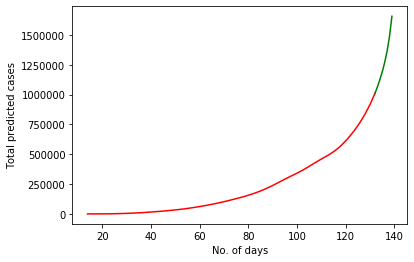

In [60]:
plt.plot(future.index[:-7], future['discovered_nodes'][:-7],'r')
plt.plot(future.index[-8:], future['discovered_nodes'][-8:],'g')
plt.xlabel('No. of days')
plt.ylabel('Total predicted cases')

## Evaluating the prediction

-55840.457919108914


Text(0, 0.5, 'Total cases confirmed')

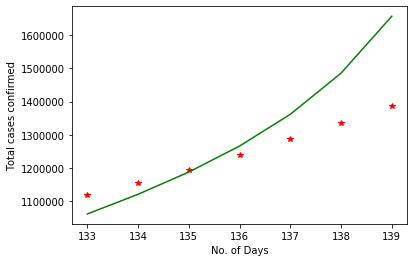

In [61]:
#plt.plot(fdata3.index[13:-14], fdata3['total_case_data'][13:-14])
plt.plot(fdata3.index[-7:], fdata3['total_case_data'][-7:],'r*')
#plt.plot(fdata3.index[13:-14], future['discovered_nodes'][:-14])
diff = list(future['discovered_nodes'][-7:]- fdata3['total_case_data'][-7:])
print(diff[0])
#future['discovered_nodes'] -= diff[0]
plt.plot(fdata3.index[-7:], future['discovered_nodes'][-7:],'g')
plt.xlabel('No. of Days')
plt.ylabel('Total cases confirmed')

In [62]:
list(fdata3['total_case_data'][-7:])

[1118108, 1154914, 1194084, 1239685, 1288128, 1337016, 1387088]